In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load file
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [5]:
# check for duplicate values
df.duplicated().sum()

np.int64(0)

In [6]:
# check for missing values
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [7]:
# Handling missing values using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df))
df_imputed.columns = df.columns
df_imputed.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [8]:
# Checking for unique values in the data
for i in df_imputed.columns:
    print('*****', i, '*****')
    print()
    print(set(df_imputed[i].tolist()))
    print()

***** id *****

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218

In [9]:
# categorical variables : rbc, pc, pcc, ba, htn, dm, cad, appet, pe, ane
# Dependent variable: classification
# numerical variables: pcv, wc, rc

In [10]:
df_imputed['pcv'].mode()

0    41
Name: pcv, dtype: object

In [11]:
df_imputed['pcv'] = df_imputed['pcv'].apply(lambda x: '43' if x=='\t43' else x)
df_imputed['pcv'] = df_imputed['pcv'].apply(lambda x: '41' if x=='\t?' else x)

In [12]:
df_imputed['wc'] = df_imputed['wc'].apply(lambda x: '8400' if x=='\t8400' else x)
df_imputed['wc'] = df_imputed['wc'].apply(lambda x: '6200' if x=='\t6200' else x)
df_imputed['wc'] = df_imputed['wc'].apply(lambda x: '9800' if x=='\t?' else x)

In [13]:
df_imputed['wc'].mode()

0    9800
Name: wc, dtype: object

In [14]:
df_imputed['rc'].mode()

0    5.2
Name: rc, dtype: object

In [15]:
df_imputed['rc'] = df_imputed['rc'].apply(lambda x: '5.2' if x=='\t?' else x)

In [16]:
df_imputed['pcv'] = df_imputed['pcv'].astype('int64')
df_imputed['wc'] = df_imputed['wc'].astype('int64')
df_imputed['rc'] = df_imputed['rc'].astype('float64')

In [17]:
for i in df_imputed.columns:
    print('*****', i, '*****')
    print()
    print(set(df_imputed[i].tolist()))
    print()

***** id *****

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218

In [18]:
df_imputed['dm'] = df_imputed['dm'].apply(lambda x: 'yes' if x=='\tyes' else x)
df_imputed['dm'] = df_imputed['dm'].apply(lambda x: 'no' if x=='\tno' else x)
df_imputed['dm'] = df_imputed['dm'].apply(lambda x: 'yes' if x==' yes' else x)

In [19]:
df_imputed['cad'] = df_imputed['cad'].apply(lambda x: 'no' if x=='\tno' else x)

In [20]:
df_imputed['classification'] = df_imputed['classification'].apply(lambda x:'ckd' if x=='ckd\t' else x)

In [21]:
# encoding categorical variables
df_imputed = pd.get_dummies(df_imputed, columns=['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], drop_first=True)

In [22]:
df_imputed

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,0,48.0,80.0,1.02,1.0,0.0,121.0,36.0,1.2,135.0,...,True,True,False,False,True,True,False,False,False,False
1,1,7.0,50.0,1.02,4.0,0.0,99.0,18.0,0.8,135.0,...,True,True,False,False,False,False,False,False,False,False
2,2,62.0,80.0,1.01,2.0,3.0,423.0,53.0,1.8,135.0,...,True,True,False,False,False,True,False,True,False,True
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,True,False,True,False,True,False,False,True,True,True
4,4,51.0,80.0,1.01,2.0,0.0,106.0,26.0,1.4,135.0,...,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,140.0,49.0,0.5,150.0,...,True,True,False,False,False,False,False,False,False,False
396,396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,...,True,True,False,False,False,False,False,False,False,False
397,397,12.0,80.0,1.02,0.0,0.0,100.0,26.0,0.6,137.0,...,True,True,False,False,False,False,False,False,False,False
398,398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,...,True,True,False,False,False,False,False,False,False,False


In [24]:
df_imputed1 = df_imputed

In [27]:
# to convert numerical columns to float
for i in df.select_dtypes(exclude=['object']).columns:
    df_imputed[i] = df_imputed[i].apply(lambda x: float(x))

In [28]:
df_imputed.dtypes

id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int64
wc                  int64
rc                float64
classification     object
rbc_normal           bool
pc_normal            bool
pcc_present          bool
ba_present           bool
htn_yes              bool
dm_yes               bool
cad_yes              bool
appet_poor           bool
pe_yes               bool
ane_yes              bool
dtype: object

In [29]:
for i in df_imputed.columns:
    print('*****', i , '*****')
    print()
    print(set(df_imputed[i].tolist()))
    print()

***** id *****

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 1

In [30]:
# Converting boolean columns to numeric
df_imputed['rbc_normal'] = np.where(df_imputed['rbc_normal']==True, 1, 0)
df_imputed['pc_normal'] = np.where(df_imputed['pc_normal']==True, 1, 0)
df_imputed['pcc_present'] = np.where(df_imputed['pcc_present']==True, 1, 0)
df_imputed['ba_present'] = np.where(df_imputed['ba_present']==True, 1, 0)
df_imputed['htn_yes'] = np.where(df_imputed['htn_yes']==True, 1, 0)
df_imputed['dm_yes'] = np.where(df_imputed['dm_yes']==True, 1, 0)
df_imputed['cad_yes'] = np.where(df_imputed['cad_yes']==True, 1, 0)
df_imputed['appet_poor'] = np.where(df_imputed['appet_poor']==True, 1, 0)
df_imputed['pe_yes'] = np.where(df_imputed['pe_yes']==True, 1, 0)
df_imputed['ane_yes'] = np.where(df_imputed['ane_yes']==True, 1, 0)
df_imputed

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,0.0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,135.0,...,1,1,0,0,1,1,0,0,0,0
1,1.0,7.0,50.0,1.020,4.0,0.0,99.0,18.0,0.8,135.0,...,1,1,0,0,0,0,0,0,0,0
2,2.0,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,135.0,...,1,1,0,0,0,1,0,1,0,1
3,3.0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,1,0,1,0,1,0,0,1,1,1
4,4.0,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,135.0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,...,1,1,0,0,0,0,0,0,0,0
396,396.0,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,...,1,1,0,0,0,0,0,0,0,0
397,397.0,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,...,1,1,0,0,0,0,0,0,0,0
398,398.0,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,...,1,1,0,0,0,0,0,0,0,0


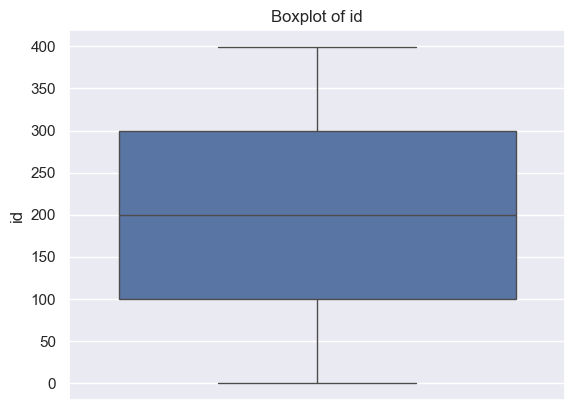

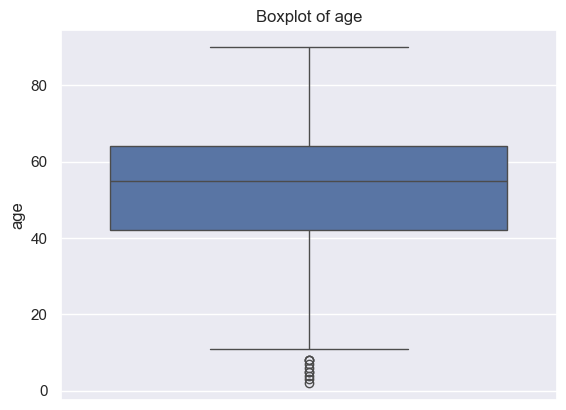

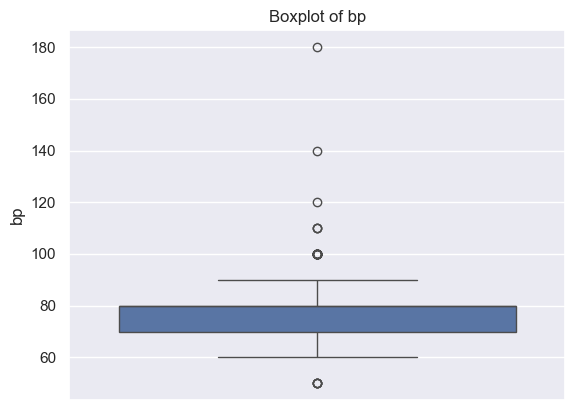

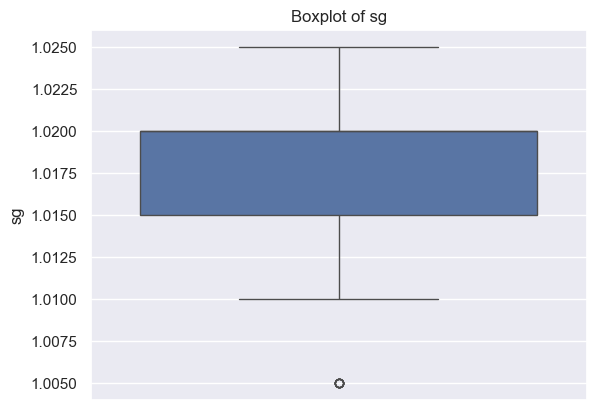

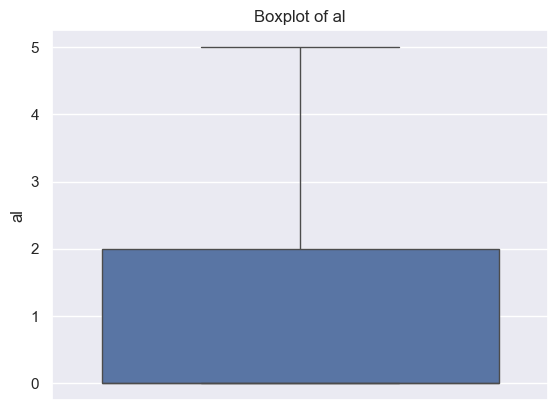

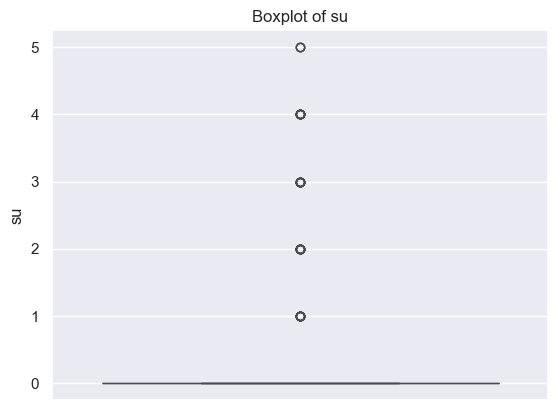

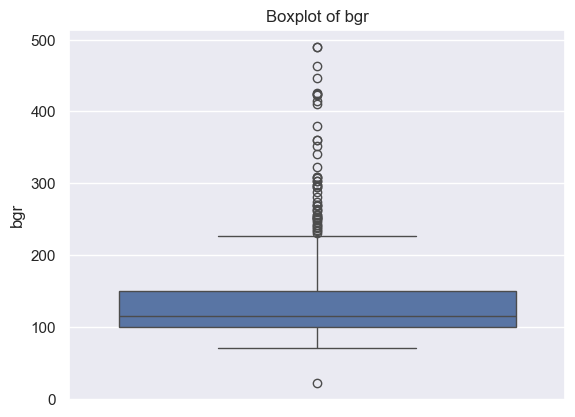

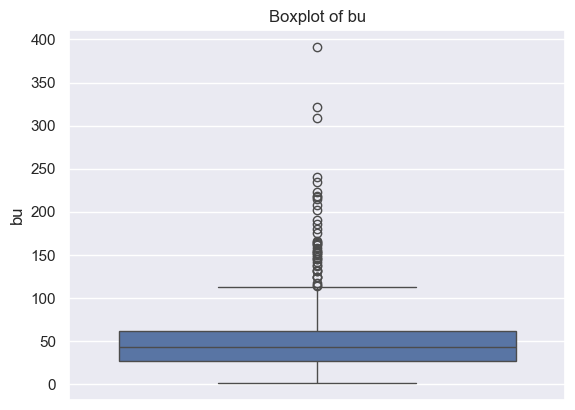

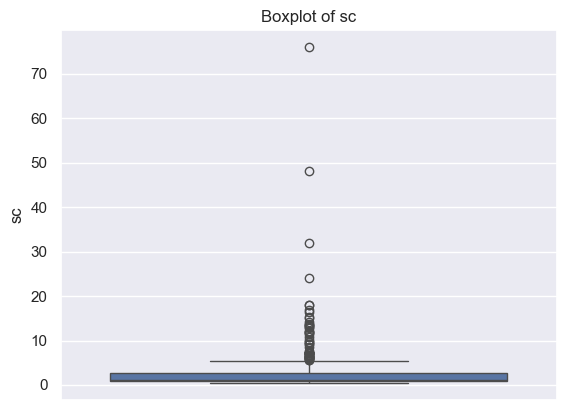

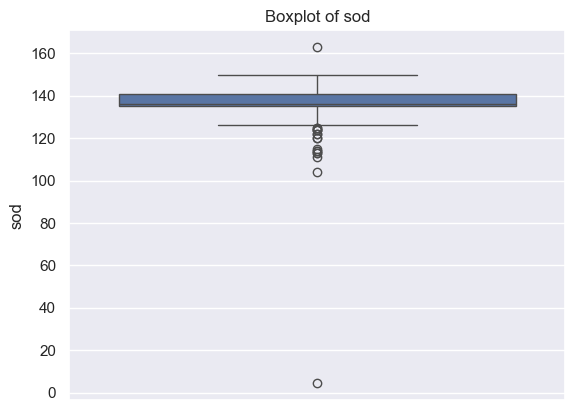

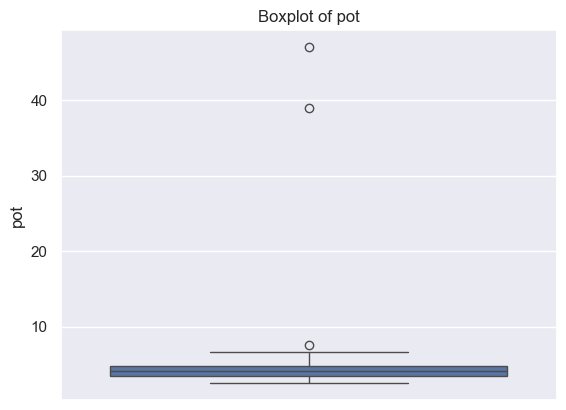

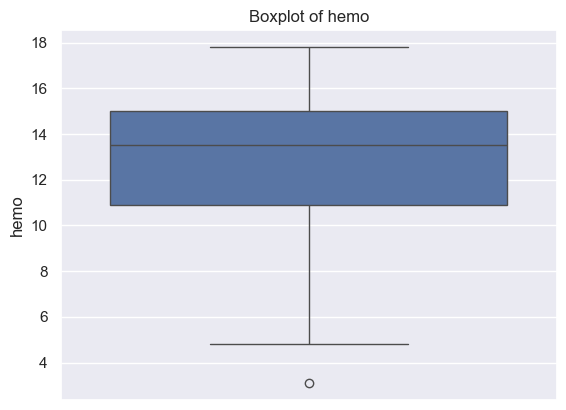

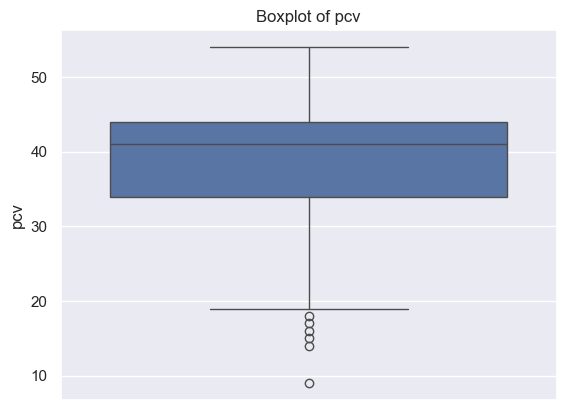

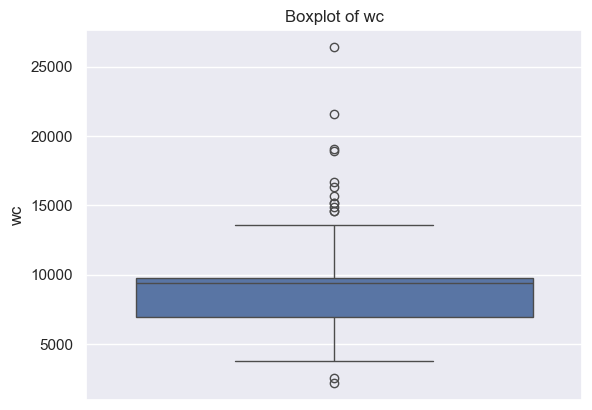

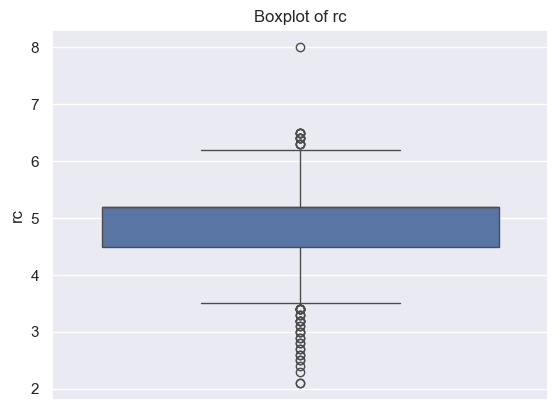

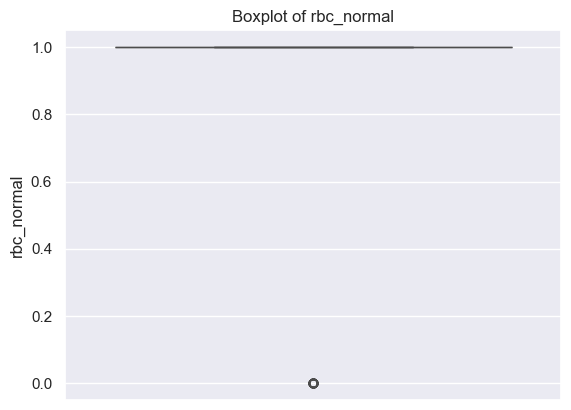

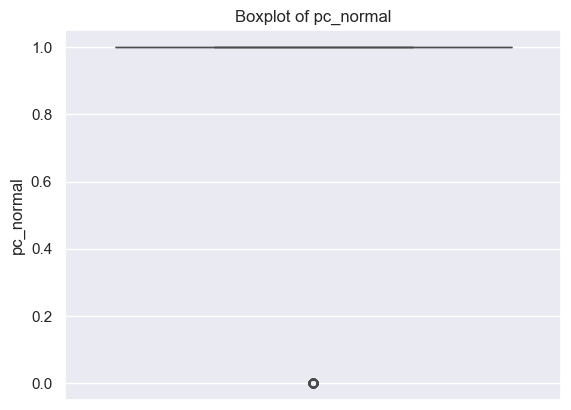

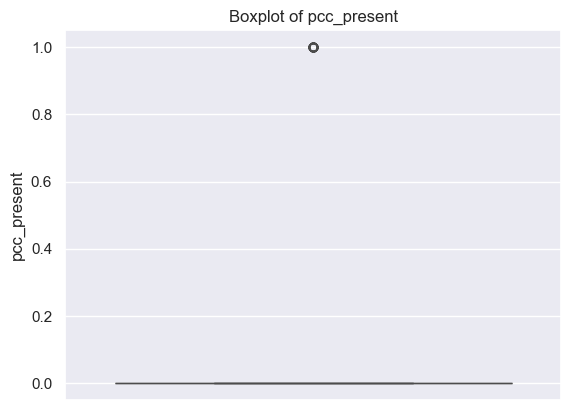

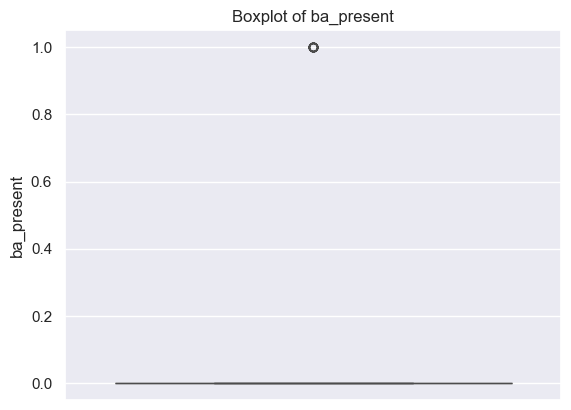

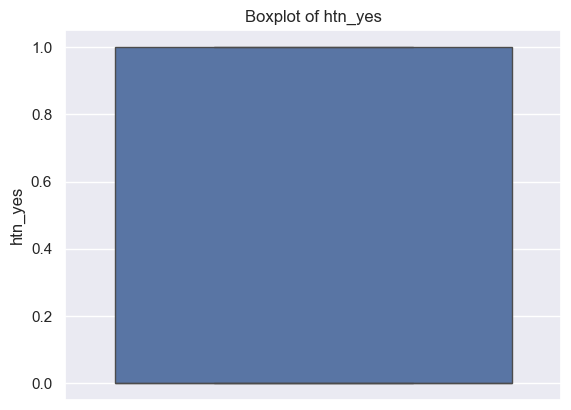

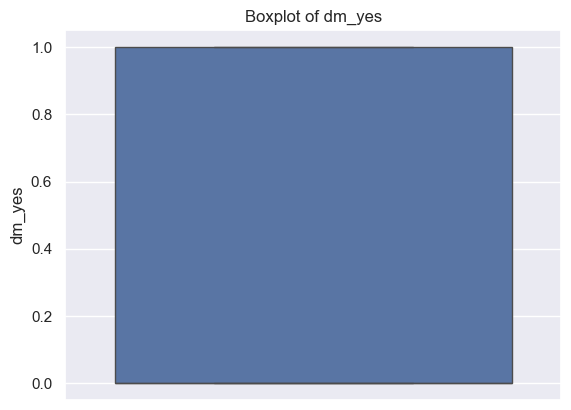

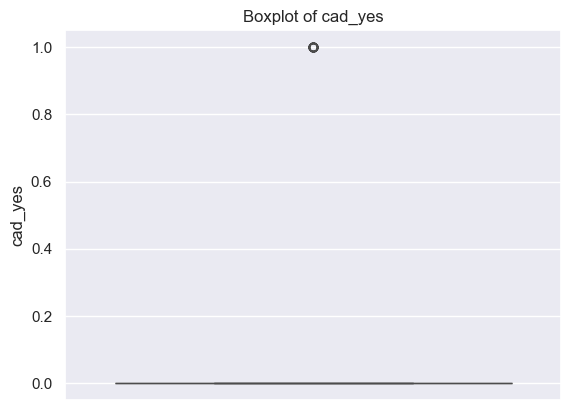

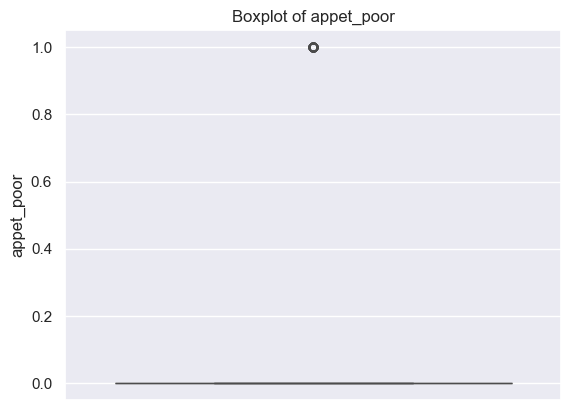

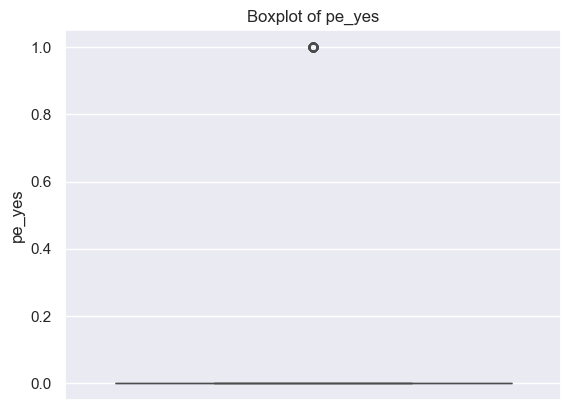

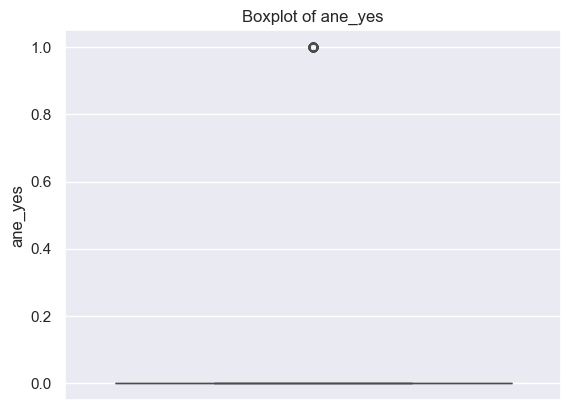

In [34]:
# checking for outliers
def boxplots(col):
    sns.boxplot(df_imputed[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

for i in df_imputed.select_dtypes(exclude=['object']).columns:
    boxplots(i)

In [35]:
df_imputed1 = df_imputed

In [36]:
df_imputed.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.675000,76.575000,1.017712,0.90000,0.395000,142.642500,56.883000,2.992875,136.978750,...,0.882500,0.810000,0.105000,0.055000,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000
std,115.614301,17.022008,13.489785,0.005434,1.31313,1.040038,76.344226,49.345921,5.630207,9.263352,...,0.322418,0.392792,0.306937,0.228266,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,99.000000,27.000000,0.900000,135.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,80.000000,1.020000,0.00000,0.000000,114.500000,44.000000,1.200000,136.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


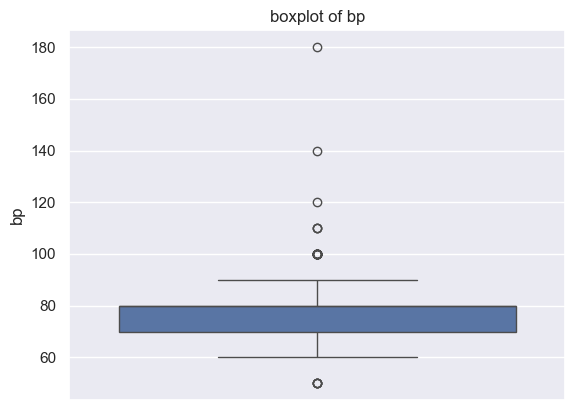

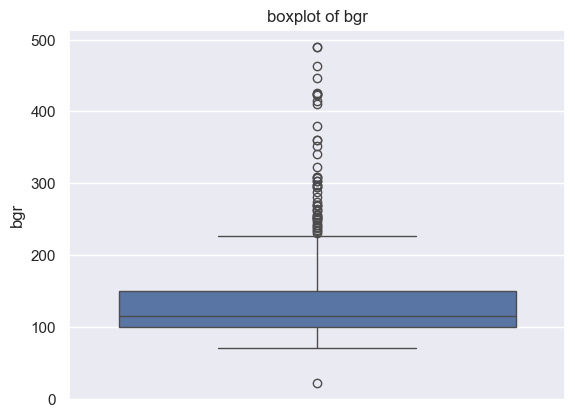

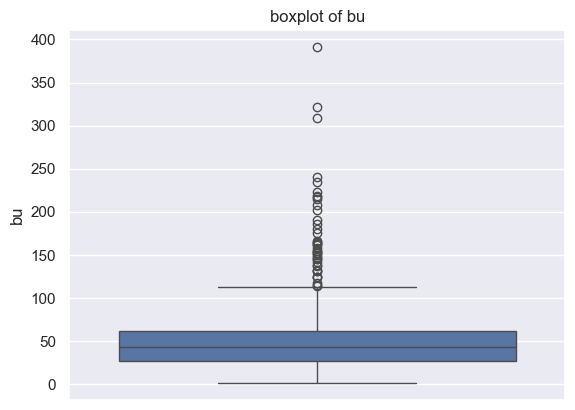

In [38]:
for i in ['bp', 'bgr', 'bu']:
    sns.boxplot(df_imputed[i])
    plt.title(f"boxplot of {i}")
    plt.show()

In [40]:
df_imputed[['bp', 'bu', 'bgr']].describe()

,bp,bu,bgr
count,400.000000,400.000000,400.000000
mean,76.575000,56.883000,142.642500
std,13.489785,49.345921,76.344226
min,50.000000,1.500000,22.000000
25%,70.000000,27.000000,99.000000
50%,80.000000,44.000000,114.500000
75%,80.000000,61.750000,150.000000
max,180.000000,391.000000,490.000000


In [42]:
# handling outlier bp with IQR capping
Q1 = 70.000000
Q3 = 80.000000
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(upper_limit)
print(lower_limit)

95.0
55.0


In [44]:
df_imputed['bp'] = np.where(df_imputed['bp']>upper_limit, upper_limit,
                           np.where(df_imputed['bp']<lower_limit, lower_limit, df_imputed['bp']))

In [45]:
# bu
Q1 = 27.000000
Q3 = 61.750000
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(upper_limit)
print(lower_limit)

113.875
-25.125


In [46]:
df_imputed['bu'] = np.where(df_imputed['bu']>upper_limit, upper_limit,
                           np.where(df_imputed['bu']<lower_limit, lower_limit, df_imputed['bu']))

In [47]:
# bgr
Q1 = 99.000000
Q3 = 150.000000
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(upper_limit)
print(lower_limit)

226.5
22.5


In [48]:
df_imputed['bgr'] = np.where(df_imputed['bgr']>upper_limit, upper_limit,
                            np.where(df_imputed['bgr']<lower_limit, lower_limit, df_imputed['bgr']))

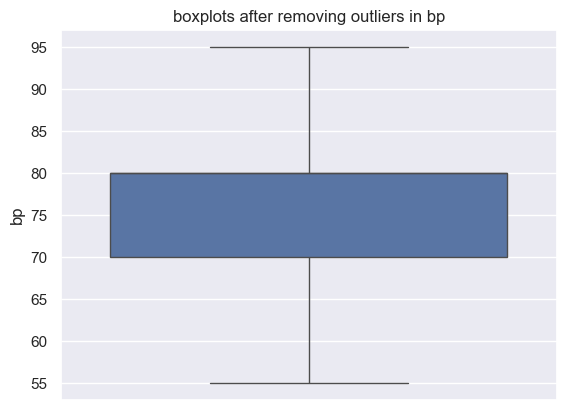

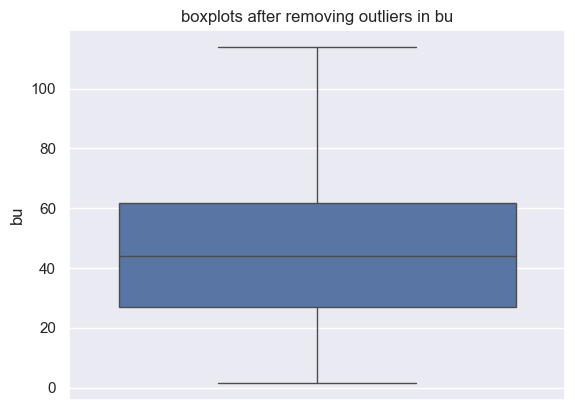

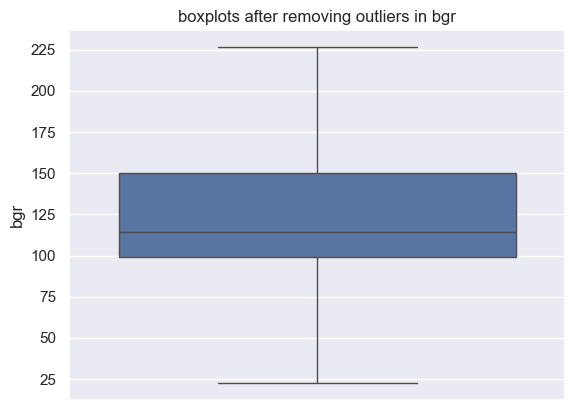

In [49]:
for i in ['bp', 'bu', 'bgr']:
    sns.boxplot(df_imputed[i])
    plt.title(f"boxplots after removing outliers in {i}")
    plt.show()

In [52]:
df_imputed['classification'] = df_imputed['classification'].astype('category')
df_imputed['classification'] = df_imputed['classification'].cat.codes

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

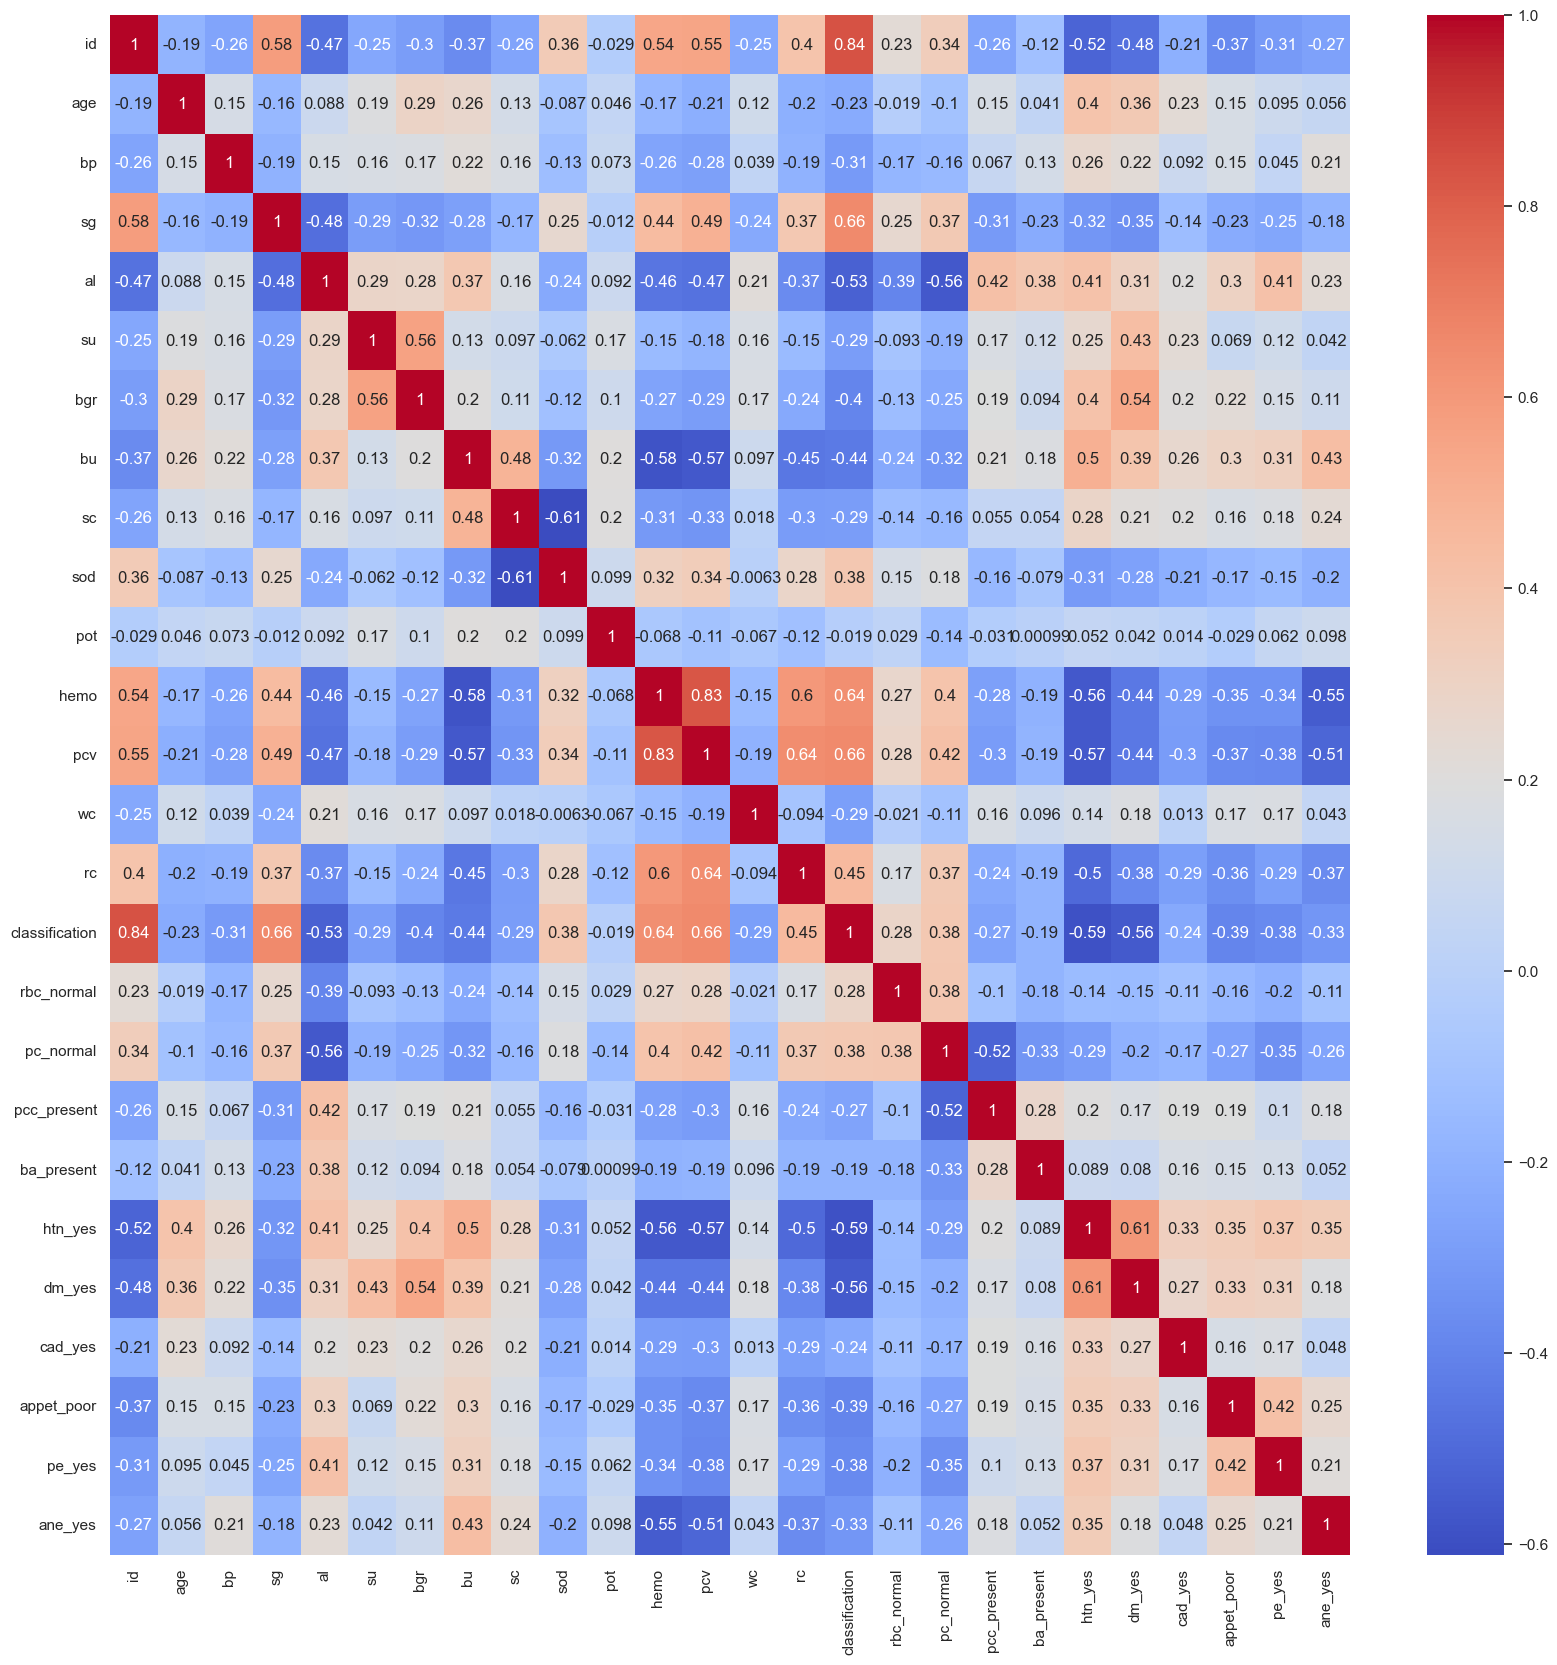

In [53]:
# checking correlation
plt.figure(figsize=(20,20))
corr = df_imputed.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [55]:
# split into independent and dependent variables
x = df_imputed.drop(['id', 'classification'], axis=1)
y = df_imputed['classification']

In [56]:
y.value_counts()

classification
0    250
1    150
Name: count, dtype: int64

In [58]:
!pip install imblearn

In [60]:
# detecting and treating label imbalance
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x,y)
y_ros.value_counts()

classification
0    250
1    250
Name: count, dtype: int64

In [62]:
# feature scaling independent variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1, 1))
x = scaler.fit_transform(x_ros)
y = y_ros
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.045455,0.25,0.5,-0.6,-1.0,-0.034314,-0.385984,-0.978836,0.646688,-0.955056,...,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0
1,-0.886364,-1.00,0.5,0.6,-1.0,-0.250000,-0.706340,-0.989418,0.646688,-0.955056,...,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,0.363636,0.25,-0.5,-0.2,0.2,1.000000,-0.083426,-0.962963,0.646688,-0.955056,...,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0
3,0.045455,-0.25,-1.0,0.6,-1.0,-0.073529,-0.030033,-0.910053,0.343849,-1.000000,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
4,0.113636,0.25,-0.5,-0.2,-1.0,-0.181373,-0.563960,-0.973545,0.646688,-0.955056,...,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.227273,0.25,1.0,-1.0,-1.0,0.142157,-0.759733,-0.978836,0.646688,-0.887640,...,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
496,0.386364,-0.25,0.5,-1.0,-1.0,-0.112745,-0.581758,-0.994709,0.785489,-0.892135,...,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
497,0.454545,-0.25,0.5,-1.0,-1.0,-0.299020,-0.688543,-0.992063,0.646688,-0.937079,...,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
498,-0.068182,0.25,1.0,-1.0,-1.0,-0.426471,-0.208009,-0.994709,0.646688,-0.892135,...,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [64]:
# Feature engineering with PCA
from sklearn.decomposition import PCA
pca = PCA(.95)
x_pca = pca.fit_transform(x)
print(x.shape)
print(x_pca.shape)

(500, 24)
(500, 16)


In [65]:
# split data for model building and prediction
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42, stratify=y)

In [70]:
# building algorithm model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from xgboost import XGBClassifier

In [72]:
#LogisticRegression
logit = LogisticRegression()
lr = logit.fit(x_train, y_train)
y_pred_lr = logit.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

#DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dt = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

#RandomForestClassifier
random = RandomForestClassifier()
rd = random.fit(x_train, y_train)
y_pred_rd = random.predict(x_test)
accuracy_rd = accuracy_score(y_test, y_pred_rd)

#BaggingClassifier
bagg = BaggingClassifier()
bg = bagg.fit(x_train, y_train)
y_pred_bg = bagg.predict(x_test)
accuracy_bg = accuracy_score(y_test, y_pred_bg)

#GradientBoostingClassifier
gradient = GradientBoostingClassifier()
gd = gradient.fit(x_train, y_train)
y_pred_gd = gradient.predict(x_test)
accuracy_gd = accuracy_score(y_test, y_pred_gd)

#KNeighborsClassifier
KNN = KNeighborsClassifier()
kn = KNN.fit(x_train, y_train)
y_pred_kn = KNN.predict(x_test)
accuracy_kn = accuracy_score(y_test, y_pred_kn)

#SVC
svm = SVC()
sv = svm.fit(x_train, y_train)
y_pred_sv = svm.predict(x_test)
accuracy_sv = accuracy_score(y_test, y_pred_sv)

#BernoulliNB
BNB = BernoulliNB()
bnb = BNB.fit(x_train, y_train)
y_pred_bnb = BNB.predict(x_test)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)

#GaussianNB
GNB = GaussianNB()
gnb = GNB.fit(x_train, y_train)
y_pred_gnb = GNB.predict(x_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

#XGBClassifier
XGB = XGBClassifier()
xg = XGB.fit(x_train, y_train)
y_pred_xg = XGB.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

#VotingClassifier (combining all models)
evc = VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('rd', rd), ('bg', bg),
                                  ('gd', gd), ('kn', kn), ('sv', sv), ('bnb', bnb),
                                  ('gnb', gnb), ('xg', xg)], voting='hard', flatten_transform=True)
vot = evc.fit(x_train, y_train)
y_pred_vt = evc.predict(x_test)
accuracy_vt = accuracy_score(y_test, y_pred_vt)

list1 = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'BaggingClassifier', 'GradientBoostingClassifier', 
         'KNeighborsClassifier', 'SVC', 'BernoulliNB', 'GaussianNB', 'XGBClassifier', 'VotingClassifier']
list2 = [accuracy_lr, accuracy_dt, accuracy_rd, accuracy_bg, accuracy_gd, accuracy_kn, accuracy_sv, accuracy_bnb, accuracy_gnb,
        accuracy_xg, accuracy_vt]

df_accuracy = pd.DataFrame({'Method used': list1, 'Accuracy score': list2})
print(df_accuracy)

                   Method used  Accuracy score
0           LogisticRegression            0.97
1       DecisionTreeClassifier            1.00
2       RandomForestClassifier            1.00
3            BaggingClassifier            0.99
4   GradientBoostingClassifier            1.00
5         KNeighborsClassifier            0.96
6                          SVC            0.98
7                  BernoulliNB            0.93
8                   GaussianNB            1.00
9                XGBClassifier            0.99
10            VotingClassifier            1.00


Axes(0.125,0.11;0.775x0.77)


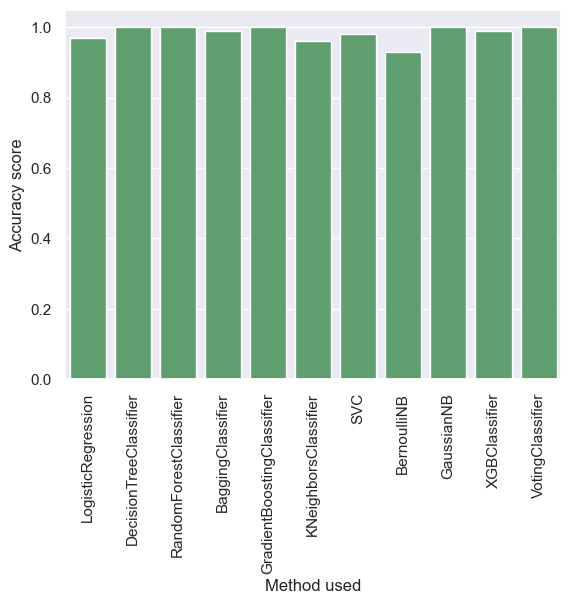

In [78]:
charts = sns.barplot(x='Method used', y='Accuracy score', data=df_accuracy)
print(charts)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
plt.show()

In [80]:
import pickle
with open("evc_kidney_disease.pkl", "wb") as file:
    pickle.dump(evc, file)